In [1]:
import requests
import json
from config import api_key
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#url = "http://beermapping.com/webservice/loccity/abe7a90e044248a05f4c1a2e55655a0f/durham,nc&s=json"

url = "http://beermapping.com/webservice/loccity/"
city1 = "Raleigh,NC"
city2 = "Asheville,NC"
city1url = url + api_key + "/" + city1 + "&s=json"
city2url = url + api_key + "/" + city2 + "&s=json"

In [3]:
city1response = requests.get(city1url)
city1_json = city1response.json()
print(json.dumps(city1_json, indent=4, sort_keys=True))


[
    {
        "blogmap": "http://beermapping.com/maps/blogproxy.php?locid=392&amp;d=1&amp;type=norm",
        "city": "Raleigh",
        "country": "United States",
        "id": 392,
        "imagecount": "2",
        "name": "Big Boss Brewing Company",
        "overall": "78.333425",
        "phone": "(919) 834-0045",
        "proxylink": "http://beermapping.com/maps/proxymaps.php?locid=392&amp;d=5",
        "reviewlink": "https://beermapping.com/location/392",
        "state": "NC",
        "status": "Brewery",
        "street": "1249 Wicker Drive",
        "url": "bigbossbrewing.com",
        "zip": "27604"
    },
    {
        "blogmap": "http://beermapping.com/maps/blogproxy.php?locid=6541&amp;d=1&amp;type=norm",
        "city": "Raleigh ",
        "country": "United States",
        "id": 6541,
        "imagecount": "0",
        "name": "Brixx Wood Fired Pizza - Raleigh",
        "overall": "0",
        "phone": "919-246-0640",
        "proxylink": "http://beermapping.com/maps

In [4]:
city2response = requests.get(city2url)
city2_json = city2response.json()
print(json.dumps(city2_json, indent=4, sort_keys=True))


[
    {
        "blogmap": "http://beermapping.com/maps/blogproxy.php?locid=55&amp;d=1&amp;type=norm",
        "city": "Asheville",
        "country": "United States",
        "id": 55,
        "imagecount": "0",
        "name": "Asheville Brewing Company",
        "overall": "82.91665",
        "phone": "(828) 254-1281",
        "proxylink": "http://beermapping.com/maps/proxymaps.php?locid=55&amp;d=5",
        "reviewlink": "https://beermapping.com/location/55",
        "state": "NC",
        "status": "Brewery",
        "street": "77 Coxe Avenue",
        "url": "ashevillebrewing.com",
        "zip": "28804"
    },
    {
        "blogmap": "http://beermapping.com/maps/blogproxy.php?locid=56&amp;d=1&amp;type=norm",
        "city": "Asheville",
        "country": "United States",
        "id": 56,
        "imagecount": "0",
        "name": "Asheville Pizza and Brewing Company",
        "overall": "85.833275",
        "phone": "(828) 254-1288",
        "proxylink": "http://beermapping.c

In [5]:
city1returns = len(city1_json) 
city2returns = len(city2_json) 
print(f"There are {city1returns} beer places in {city1} and {city2returns} beer places in {city2}.")

There are 59 beer places in Raleigh,NC and 40 beer places in Asheville,NC.


In [6]:
City1BeerDataFrame = pd.DataFrame(city1_json)
City1BeerDataFrame.head()

,blogmap,city,country,id,imagecount,name,overall,phone,proxylink,reviewlink,state,status,street,url,zip
0,http://beermapping.com/maps/blogproxy.php?loci...,Raleigh,United States,392,2,Big Boss Brewing Company,78.333425,(919) 834-0045,http://beermapping.com/maps/proxymaps.php?loci...,https://beermapping.com/location/392,NC,Brewery,1249 Wicker Drive,bigbossbrewing.com,27604
1,http://beermapping.com/maps/blogproxy.php?loci...,Raleigh,United States,6541,0,Brixx Wood Fired Pizza - Raleigh,0,919-246-0640,http://beermapping.com/maps/proxymaps.php?loci...,https://beermapping.com/location/6541,NC,Beer Bar,8511 Briercreek Parkway,brixxpizza.com/dir_raleigh.shtml,27617
2,http://beermapping.com/maps/blogproxy.php?loci...,Raleigh,United States,2787,0,42nd Street Oyster Bar and Seafood Grill,81.6667,(919) 931-2811,http://beermapping.com/maps/proxymaps.php?loci...,https://beermapping.com/location/2787,NC,Beer Bar,508 W. Jones Street,42ndstoysterbar.com/,27603
3,http://beermapping.com/maps/blogproxy.php?loci...,Raleigh,United States,2797,0,Carolina Ale House - Raleigh,73.3332,(919) 431-0001,http://beermapping.com/maps/proxymaps.php?loci...,https://beermapping.com/location/2797,NC,Beer Bar,4512 Falls Of Neuse Road,carolinaalehouse.com/,27609
4,http://beermapping.com/maps/blogproxy.php?loci...,Raleigh,United States,2806,0,Flying Saucer - Raleigh,87.00006,(919) 821-7468,http://beermapping.com/maps/proxymaps.php?loci...,https://beermapping.com/location/2806,NC,Beer Bar,328 West Morgan Street,beerknurd.com,27601


In [7]:
City1Essentials_df = City1BeerDataFrame[["id", "name", "overall", "status", "street", "city", "state", "zip" ]]
City1Essentials_df.head()

,id,name,overall,status,street,city,state,zip
0,392,Big Boss Brewing Company,78.333425,Brewery,1249 Wicker Drive,Raleigh,NC,27604
1,6541,Brixx Wood Fired Pizza - Raleigh,0,Beer Bar,8511 Briercreek Parkway,Raleigh,NC,27617
2,2787,42nd Street Oyster Bar and Seafood Grill,81.6667,Beer Bar,508 W. Jones Street,Raleigh,NC,27603
3,2797,Carolina Ale House - Raleigh,73.3332,Beer Bar,4512 Falls Of Neuse Road,Raleigh,NC,27609
4,2806,Flying Saucer - Raleigh,87.00006,Beer Bar,328 West Morgan Street,Raleigh,NC,27601


In [8]:
City2BeerDataFrame = pd.DataFrame(city2_json)
City2BeerDataFrame.head()

,blogmap,city,country,id,imagecount,name,overall,phone,proxylink,reviewlink,state,status,street,url,zip
0,http://beermapping.com/maps/blogproxy.php?loci...,Asheville,United States,55,0,Asheville Brewing Company,82.91665,(828) 254-1281,http://beermapping.com/maps/proxymaps.php?loci...,https://beermapping.com/location/55,NC,Brewery,77 Coxe Avenue,ashevillebrewing.com,28804
1,http://beermapping.com/maps/blogproxy.php?loci...,Asheville,United States,56,0,Asheville Pizza and Brewing Company,85.833275,(828) 254-1288,http://beermapping.com/maps/proxymaps.php?loci...,https://beermapping.com/location/56,NC,Brewpub,675 Merrimon Avenue,ashevillepizza.com/,28804
2,http://beermapping.com/maps/blogproxy.php?loci...,Asheville,United States,473,3,French Broad Brewing Company,87.22225,(828) 277-0222,http://beermapping.com/maps/proxymaps.php?loci...,https://beermapping.com/location/473,NC,Brewery,101-D Fairview Road,frenchbroadbrewery.com,28803
3,http://beermapping.com/maps/blogproxy.php?loci...,Asheville,United States,548,1,Green Man Ales and Brewery (Dirty Jack's),87.222216666666,(828) 252-5502,http://beermapping.com/maps/proxymaps.php?loci...,https://beermapping.com/location/548,NC,Brewery,23 Buxton Avenue,jackofthewood.com,28804
4,http://beermapping.com/maps/blogproxy.php?loci...,Asheville,United States,680,0,Jack of the Wood (Green Man Brewing),0,(828) 252-5445,http://beermapping.com/maps/proxymaps.php?loci...,https://beermapping.com/location/680,NC,Beer Bar,95 Patton Avenue,jackofthewood.com,28801


In [9]:
City2Essentials_df = City2BeerDataFrame[["id", "name", "overall", "status", "street", "city", "state", "zip" ]]
City2Essentials_df.head()

,id,name,overall,status,street,city,state,zip
0,55,Asheville Brewing Company,82.91665,Brewery,77 Coxe Avenue,Asheville,NC,28804
1,56,Asheville Pizza and Brewing Company,85.833275,Brewpub,675 Merrimon Avenue,Asheville,NC,28804
2,473,French Broad Brewing Company,87.22225,Brewery,101-D Fairview Road,Asheville,NC,28803
3,548,Green Man Ales and Brewery (Dirty Jack's),87.222216666666,Brewery,23 Buxton Avenue,Asheville,NC,28804
4,680,Jack of the Wood (Green Man Brewing),0,Beer Bar,95 Patton Avenue,Asheville,NC,28801


In [10]:
City1_df = City1Essentials_df.rename(columns={"id": "ID", "name": "Name", "overall": "Rating", "status": "Type", "city": "City", "street": "Street", "state": "State", "zip": "Zip"})
City1_df.head()

,ID,Name,Rating,Type,Street,City,State,Zip
0,392,Big Boss Brewing Company,78.333425,Brewery,1249 Wicker Drive,Raleigh,NC,27604
1,6541,Brixx Wood Fired Pizza - Raleigh,0,Beer Bar,8511 Briercreek Parkway,Raleigh,NC,27617
2,2787,42nd Street Oyster Bar and Seafood Grill,81.6667,Beer Bar,508 W. Jones Street,Raleigh,NC,27603
3,2797,Carolina Ale House - Raleigh,73.3332,Beer Bar,4512 Falls Of Neuse Road,Raleigh,NC,27609
4,2806,Flying Saucer - Raleigh,87.00006,Beer Bar,328 West Morgan Street,Raleigh,NC,27601


In [11]:
City2_df = City2Essentials_df.rename(columns={"id": "ID", "name": "Name", "overall": "Rating", "status": "Type", "city": "City", "street": "Street", "state": "State", "zip": "Zip"})
City2_df.head()

,ID,Name,Rating,Type,Street,City,State,Zip
0,55,Asheville Brewing Company,82.91665,Brewery,77 Coxe Avenue,Asheville,NC,28804
1,56,Asheville Pizza and Brewing Company,85.833275,Brewpub,675 Merrimon Avenue,Asheville,NC,28804
2,473,French Broad Brewing Company,87.22225,Brewery,101-D Fairview Road,Asheville,NC,28803
3,548,Green Man Ales and Brewery (Dirty Jack's),87.222216666666,Brewery,23 Buxton Avenue,Asheville,NC,28804
4,680,Jack of the Wood (Green Man Brewing),0,Beer Bar,95 Patton Avenue,Asheville,NC,28801


In [20]:
City1_df.to_csv("Output/City1.csv", index=False, header=True)
City2_df.to_csv("Output/City2.csv", index=False, header=True)

In [21]:
City1_highest_rating = City1_df["Rating"].max()
City2_highest_rating = City2_df["Rating"].max()
print(f"Wow, The highest rating in {city1} is {City1_highest_rating} and the highest rating in {city2} is {City2_highest_rating}")

Wow, The highest rating in Raleigh,NC is 94.9999 and the highest rating in Asheville,NC is 94.999975


In [22]:
City1_df.dtypes

ID         int64
Name      object
Rating    object
Type      object
Street    object
City      object
State     object
Zip       object
dtype: object

In [23]:
City1_df['Rating'] = pd.to_numeric(City1_df['Rating'])
City2_df['Rating'] = pd.to_numeric(City2_df['Rating'])
City1_df.dtypes

ID          int64
Name       object
Rating    float64
Type       object
Street     object
City       object
State      object
Zip        object
dtype: object

In [24]:
City1OnlyRatedPlaces = City1_df.loc[City1_df["Rating"] > 0, ["City", "ID", "Name", "Rating", "Type", "Street", "City", "State", "Zip"]]
City2OnlyRatedPlaces = City2_df.loc[City2_df["Rating"] > 0, ["City", "ID", "Name", "Rating", "Type", "Street", "City", "State", "Zip"]]
City1UnratedPlaces = City1_df.loc[City1_df["Rating"] == 0, ["City", "ID", "Name", "Rating", "Type", "Street", "City", "State", "Zip"]]
City2UnratedPlaces = City2_df.loc[City2_df["Rating"] == 0, ["City", "ID", "Name", "Rating", "Type", "Street", "City", "State", "Zip"]]
City1OnlyRatedPlaces.head()
City2OnlyRatedPlaces.head()
City1UnratedPlaces.head()
City2UnratedPlaces.head()


,City,ID,Name,Rating,Type,Street,City,State,Zip
4,Asheville,680,Jack of the Wood (Green Man Brewing),0.0,Beer Bar,95 Patton Avenue,Asheville,NC,28801
6,Asheville,2792,"Bier Garden, The",0.0,Beer Bar,46 Haywood Street,Asheville,NC,28804
7,Asheville,2820,Mellow Mushroom - Asheville,0.0,Beer Bar,50 Broadway,Asheville,NC,28801
11,Asheville,2871,Asheville Wine Market,0.0,Beer Store,65 Biltmore Ave.,Asheville,NC,28801
18,Asheville,10226,Oyster House Brewing,0.0,Brewpub,625 Haywood Rd,Asheville,NC,28806


In [25]:
BestRatedCity1 = City1_df.sort_values(["Rating"], ascending = False)
BestRatedCity1.reset_index(inplace=True)
BestRatedCity1.head()
BestRatedCity2 = City2_df.sort_values(["Rating"], ascending = False)
BestRatedCity2.reset_index(inplace=True)
BestRatedCity2.head()

,index,ID,Name,Rating,Type,Street,City,State,Zip
0,13,3899,Bruisin' Ales,94.999975,Beer Store,66 Broadway Street,Asheville,NC,28801
1,15,6994,"Thirsty Monk, The",93.333350,Beer Bar,50 Commerce Street,Asheville,NC,28806
2,16,7689,Wedge Brewing Company,88.750012,Brewery,129 B Roberts Street,Asheville,NC,28801
3,24,16646,Wicked Weed Brewing,87.777800,Brewpub,91 Biltmore Ave,Asheville,NC,28801
4,2,473,French Broad Brewing Company,87.222250,Brewery,101-D Fairview Road,Asheville,NC,28803


Text(0.5, 1.0, 'Rating by Location in Raleigh')

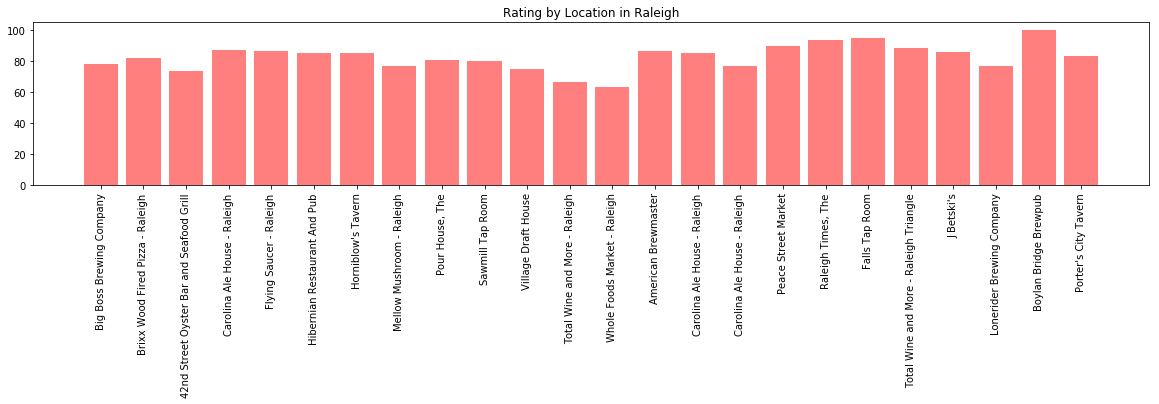

In [26]:
x_axis = np.arange(len(City1OnlyRatedPlaces))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, City1OnlyRatedPlaces["Rating"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, City1_df["Name"], rotation="vertical")
plt.title("Rating by Location in Raleigh")
#When it is not 2:00am, go back and look how to bring a variable name in the title so you can call City1 instead of "Raleigh"

Text(0.5, 1.0, 'Rating by Location in Asheville')

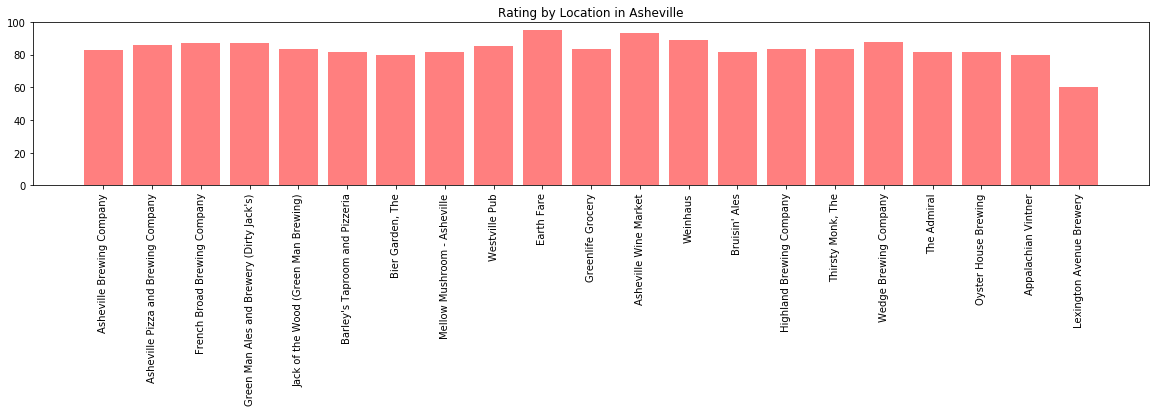

In [27]:
x_axis = np.arange(len(City2OnlyRatedPlaces))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, City2OnlyRatedPlaces["Rating"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, City2_df["Name"], rotation="vertical")
plt.title("Rating by Location in Asheville")